## importando matplotlib para fazer o gráfico

In [21]:
import matplotlib.pyplot as plt

1. constructor (_init_)
    * Ela Inicializa uma instancia da classe **Acao** com os atributos **nome ,preco_compra ,preco_venda e quantidade**.
    * Verifica se os preços e a quantidade são positivos. Se não forem, lança um erro **(ValueError)**.
2. Método calcular_valor_ganho:
    * Calcula o lucro obtido com a venda das ações, subtraindo o preço de compra do preço de venda e multiplicando pela quantidade de ações.

In [22]:
class Acao:
    def __init__(self, nome, preco_compra, preco_venda, quantidade):
        if preco_compra <= 0 or preco_venda <= 0 or quantidade <= 0:
            raise ValueError("Preço de compra, preço de venda e quantidade devem ser positivos.")
        self.nome = nome
        self.preco_compra = preco_compra
        self.preco_venda = preco_venda
        self.quantidade = quantidade

    def calcular_valor_ganho(self):
        return (self.preco_venda - self.preco_compra) * self.quantidade

In [23]:
def criar_acoes(dados_acoes):
    acoes = []
    for nome, preco_compra, preco_venda, quantidade in dados_acoes:
        if not isinstance(nome, str):
            raise TypeError("O nome da ação deve ser uma string.")
        if not all(isinstance(valor, (int, float)) and valor > 0 for valor in (preco_compra, preco_venda, quantidade)):
            raise ValueError("Os valores de preço e quantidade devem ser números positivos.")
        acao = Acao(nome, preco_compra, preco_venda, quantidade)
        acoes.append(acao)
    return acoes

In [24]:
def calcular_valores_totais(acoes):
    return [acao.calcular_valor_ganho() for acao in acoes]

In [25]:
def plotar_grafico(mes, valores_totais, nomes_acoes):
    if len(mes) != len(valores_totais):
        raise ValueError("A quantidade de meses deve ser igual à quantidade de valores totais.")

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(mes, valores_totais, marker='o', linestyle='-', color='b')

    for i, txt in enumerate(nomes_acoes):
        ax.annotate(txt, (mes[i], valores_totais[i]))

    ax.set_title('Valores Totais por Mês', fontsize=16)
    ax.set_xlabel('Meses', fontsize=14)
    ax.set_ylabel('Valor Total', fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

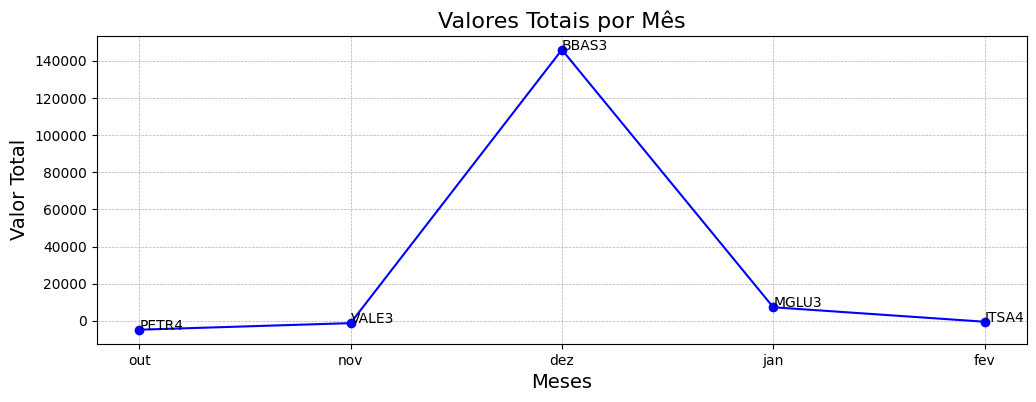

In [26]:
dados_acoes = [
    ("PETR4", 50.0, 2.0, 100),
    ("VALE3", 100.0, 75.0, 50),
    ("BBAS3", 2.0, 75.0, 2000),
    ("MGLU3", 20.0, 750.0, 10),
    ("ITSA4", 15.0, 5.0, 50)
]

acoes = criar_acoes(dados_acoes)
valores_totais = calcular_valores_totais(acoes)
nomes_acoes = [acao.nome for acao in acoes]
plotar_grafico(['out', 'nov', 'dez', 'jan', 'fev'], valores_totais, nomes_acoes)